In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
#import tree_for_huffman

In [27]:
class TreeNode:
    def __init__(self,data,probability):
        self.data = data
        self.probability = probability
        self.children = []
        self.parent = None
        self.bit = None
        self.bit_sequence = False

    def add_child(self,child):
        child.parent = self
        self.children.append(child)

    def print_tree(self):
        spaces = ' ' * self.get_level() * 3
        prefix = spaces + "|__" if self.parent else ""
        print(prefix + self.data , self.probability,"Bit - ",self.bit,"Bit sequence - ",self.bit_sequence) 
        
        if self.children:
            for i in self.children:
                i.print_tree()

    def get_level(self):
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level
    def assign_bits(self):
        #assign bits to children
        # print(type(self.children))
        
        if self.children:
            self.children[0].bit = "1"
            self.children[1].bit = "0"
            for i in self.children:
                i.assign_bits()
                
    def assign_bit_sequence(self):
        # print(self.data)
        #handling the root node
        if not self.parent:
            for i in self.children:
                    i.assign_bit_sequence()
        if self.parent:
            self.bit_sequence = self.parent.bit_sequence + self.bit
            if self.children:
                for i in self.children:
                        i.assign_bit_sequence()
            else:
                self.bit_sequence = self.bit_sequence[1:]

    def get_leaf_values(self):

        if not self.children:
            #a leaf node
            return self.data,self.bit_sequence

        left_values = self.children[0].get_leaf_values()
        right_values = self.children[1].get_leaf_values()
        self.children[0].get_leaf_values()
        self.children[1].get_leaf_values()

        return left_values,right_values
def flatten_tuple(nested_tuple):
    flattened_list = []
    for element in nested_tuple:
        if isinstance(element, tuple):
            flattened_list.extend(flatten_tuple(element))
        else:
            flattened_list.append(element)
    tuples_list = []

    # for i in range(0, len(flattened_list), 2):
    #     tuples_list.append((flattened_list[i], flattened_list[i + 1]))
    # print(tuples_list)
    return flattened_list

def build_huffman_tree_from_leaves(leaves_):
    #creating leaf nodes for each symbol
    #A = 0.13 ,B = 0.26 ,C = 0.5 ,D =0.11
    # test = TreeNode("T",0.11)
    # symbol_1 = TreeNode("A",0.05)
    # symbol_2 = TreeNode("B",0.09)
    # symbol_3 = TreeNode("C",0.12)
    # symbol_4 = TreeNode("D",0.13)
    # symbol_5 = TreeNode("E",0.16)
    # symbol_6 = TreeNode("F",0.45)
    

    # leaves = [symbol_1,symbol_2,symbol_3,symbol_4,symbol_5,symbol_6]
    sorted_leaves = sorted(leaves_, key=lambda node: node.probability, reverse=True)
    # #now itteratively create the tree
    count = 1
    while len(sorted_leaves)>1:
        new_node_probability = sorted_leaves[-1].probability + sorted_leaves[-2].probability
        new_node = TreeNode(data= f"inter_{count}",probability=new_node_probability)
        new_node.add_child(sorted_leaves[-2])
        new_node.add_child(sorted_leaves[-1]) # does this order matter
        sorted_leaves = sorted_leaves[:-2]
        sorted_leaves.append(new_node)
        sorted_leaves = sorted(sorted_leaves, key=lambda node: node.probability, reverse=True)
        count = count + 1
    sorted_leaves[-1].bit_sequence = "X" 
    sorted_leaves[-1].assign_bits()
    sorted_leaves[-1].assign_bit_sequence()
    # sorted_leaves[-1].print_tree()
    flattened_list = flatten_tuple(sorted_leaves[-1].get_leaf_values())
    tuple_list = []
    for i in range(0, len(flattened_list), 2):
        tuple_list.append((flattened_list[i], flattened_list[i + 1]))
    flattened_list = tuple_list
    
    # print(flattened_list)
    return flattened_list

(612, 612)


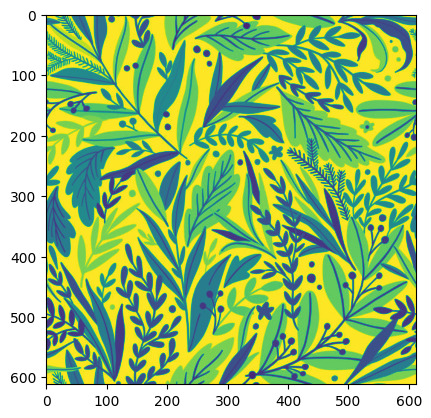

In [28]:
image = cv2.imread("Pattern.jpg",cv2.IMREAD_GRAYSCALE) #read the image as gray scale
# cropped = image[0:16,124:(124+16),1:2]
cropped = image[0:16,124:(124+16)]
print(image.shape)
plt.imshow(image)

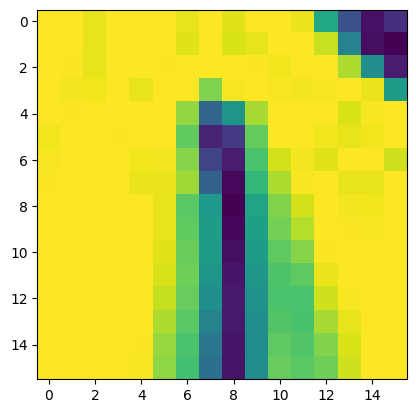

In [29]:
plt.imshow(cropped)

[ 74  75  77  78  81  83  84  85  87  88  91  99 105 111 119 130 133 140
 146 154 155 162 164 166 170 172 173 174 177 180 182 194 200 203 204 205
 206 209 210 211 212 213 214 215 217 220 221 222 224 226 227 229 231 233
 235 239 240 242 243 244 245 246 247 248 249 250 251 252 253 254 255]
[  1   1   1   1   2   1   1   2   2   2   1   1   1   1   1   1   1   1
   1   1   1   2   3   1   3   1   2   2   1   1   1   1   1   1   4   1
   2   3   3   2   1   2   1   2   1   1   2   2   1   1   1   1   2   3
   1   1   1   3   2   1   3   3   1   7   5   5   7   5   9   9 112]


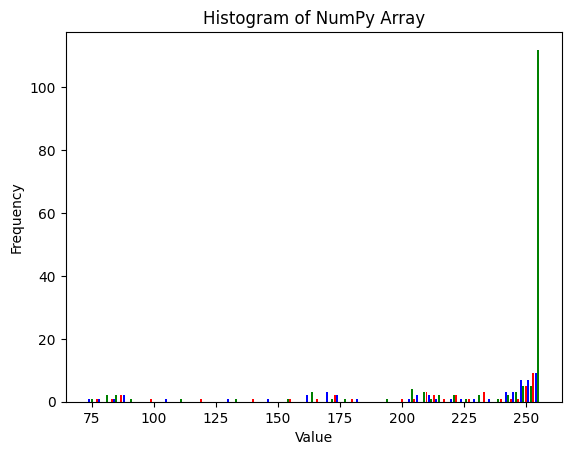

In [30]:
fig, ax = plt.subplots()
uniques,counts = np.unique(cropped.flatten(),return_counts = True)
print(uniques)
print(counts)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color = colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')
plt.show()

In [31]:
# print("max - ",np.max(cropped))
# print("min - ",np.min(cropped))
# print("original range",np.max(cropped)-np.min(cropped))#range >> round this up to the nearest multiple of 8
# range = np.max(cropped)-np.min(cropped)
# print("range/7 - ",range/7)
# print("range length - ",math.ceil(range/7))
# print("updated range - ",math.ceil(range/7)*7)

In [32]:
def quantinze(number,cropped):
    # image = cv2.imread("Pattern.jpg",cv2.IMREAD_GRAYSCALE)
    # image = image[0:16,124:(124+16)]
    image = cropped
    #quantice a number
    number_of_ranges = 7
    max_ = np.max(image)
    min_ = np.min(image)
    range_ = max_ - min_
    range_length = math.ceil(range_/number_of_ranges)
    updated_range = range_length*number_of_ranges
    value_to_add_for_range = updated_range - range_
    if (max_+ number_of_ranges) <= 255:
        max_ = max_ + value_to_add_for_range
    else:
        min_ = min_ - value_to_add_for_range
    quantized = None
    #find in which range the number is in
    #assign the quantized value 
    middle = min_ + (math.ceil((number-min_)/range_length)-1)*range_length + range_length/2 #middle value of the range it belongs
    if number<min_:
        quantized = min_
    elif number > max_:
        quantized = max_
    elif number < middle:
        quantized = min_ + (math.ceil((number-min_)/range_length)-1)*range_length
    else:
        quantized = min_ + (math.ceil((number-min_)/range_length))*range_length
    # print("min - ",min_)
    # print("max - ",max_)
    # print(quantized)
    return quantized



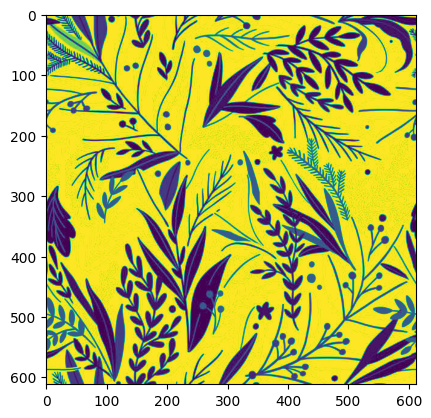

In [33]:
grayscale_image = cv2.imread("Pattern.jpg",cv2.IMREAD_GRAYSCALE) #grayscale image
cropped_gray_scale = grayscale_image[0:16,124:(124+16)] #cropped gray scale
rgb_image = cv2.imread("Pattern.jpg") #rgb image
red_channel = rgb_image[:,:,2:3]
plt.imshow(red_channel)

In [34]:
grayscale_image = cv2.imread("Pattern.jpg",cv2.IMREAD_GRAYSCALE) #grayscale image
cropped_gray_scale = grayscale_image[0:16,124:(124+16)] #cropped gray scale
rgb_image = cv2.imread("Pattern.jpg") #rgb image
red_channel = rgb_image[:,:,2:3]


new_arr = cropped.flatten()
new_arr = np.vectorize(lambda x: quantinze(x,cropped_gray_scale))(red_channel)

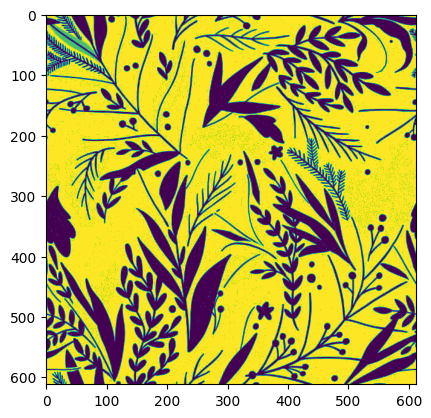

In [35]:
plt.imshow(new_arr)

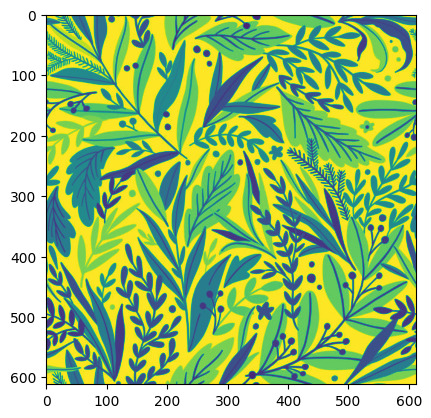

In [36]:
plt.imshow(image)

In [37]:
new_arr = np.reshape(new_arr,(16,16,1))
print(np.unique(new_arr))
# print(new_arr)

ValueError: cannot reshape array of size 374544 into shape (16,16,1)

In [ ]:
new_arr = np.reshape(new_arr,(16,16,1))
uniques,counts = np.unique(new_arr,return_counts = True)
print(uniques)
print(counts)

In [ ]:
plt.imshow(new_arr)

In [ ]:
fig, ax = plt.subplots()
uniques,counts = np.unique(new_arr.flatten(),return_counts = True)
print(uniques)
print(counts)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color=colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')
plt.show()

In [ ]:
plt.imshow(new_arr)

Calculate probabilities

In [ ]:
# new_arr = np.reshape(new_arr,(16,16,1))
uniques,counts = np.unique(new_arr,return_counts = True)
probabilities = counts/np.sum(counts)
print(uniques)
print(counts)
print(probabilities)
print(np.sum(probabilities))

create leaf nodes

In [ ]:
symbols_objects = []
for data,probabiliy in zip(uniques.tolist(),probabilities):
    leaf = TreeNode(str(data),probabiliy)
    symbols_objects.append(leaf)

In [ ]:
codes = build_huffman_tree_from_leaves(symbols_objects)
result = {}

for item in codes:
    result[item[0]] = item[1]
print(result)


In [ ]:
array_to_compress = new_arr.flatten()
bit_sequence = ""
for i in array_to_compress:
    symbol = result[str(i)]
    bit_sequence = bit_sequence + symbol
print(bit_sequence)

Decode

In [ ]:
decoded_values = []

print("len - ",len(bit_sequence))
while bit_sequence:
    for codeword, value in result.items():
        if bit_sequence.startswith(value):
            # print(codeword)
            decoded_values.append(int(codeword))
            bit_sequence = bit_sequence[len(value):]
            # break
decoded_values = np.array(decoded_values)
print(decoded_values.shape)
# decoded_values = np.reshape(decoded_values,(16,16,1))


In [ ]:
decoded_values = np.reshape(decoded_values,(612,612,1))
plt.imshow(decoded_values)